In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
data = pd.read_csv("Data/full_dat.csv", index_col=[0,1])
data.dropna(inplace=True)
sent_columns = ['neg', 'neu', 'pos']
happy_columns = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

In [3]:
data.head()

iso3 ISO-alpha3 Code Region Name Sub-region Name  \
Country Year                                                    
Austria 2006  AUT             AUT      Europe  Western Europe   
        2008  AUT             AUT      Europe  Western Europe   
        2010  AUT             AUT      Europe  Western Europe   
        2011  AUT             AUT      Europe  Western Europe   
        2012  AUT             AUT      Europe  Western Europe   

             Developed / Developing Countries  Session  \
Country Year                                             
Austria 2006                        Developed       61   
        2008                        Developed       63   
        2010                        Developed       65   
        2011                        Developed       66   
        2012                        Developed       67   

                                                         Speech    neg    neu  \
Country Year                                                                    
Austria 2006  “United in diversity”: \nthis motto of the Eur...  0.074  0.743   
        2008  These days, on our \ntelevision screens, image...  0.078  0.683   
        2010  The tragic \nearthquake in Haiti, the devastat...  0.060  0.698   
        2011  This year has once \nagain confirmed the impor...  0.063  0.723   
        2012  The events of recent\nmonths have illustrated ...  0.094  0.693   

                pos  Life Ladder  Log GDP per capita  Social support  \
Country Year                                                           
Austria 2006  0.183     7.122211           10.841940        0.936350   
        2008  0.239     7.180954           10.886662        0.934593   
        2010  0.242     7.302679           10.861471        0.914193   
        2011  0.214     7.470513           10.886909        0.944157   
        2012  0.213     7.400689           10.889132        0.945142   

              Healthy life expectancy at birth  Freedom to make life choices  \
Country Year                                                                   
Austria 2006                         70.760002                      0.941382   
        2008                         71.080002                      0.879069   
        2010                         71.400002                      0.895980   
        2011                         71.540001                      0.939356   
        2012                         71.680000                      0.919704   

              Generosity  Perceptions of corruption  Positive affect  \
Country Year                                                           
Austria 2006    0.302386                   0.490111         0.823105   
        2008    0.291309                   0.613625         0.832170   
        2010    0.130891                   0.546145         0.814719   
        2011    0.131578                   0.702721         0.789471   
        2012    0.117804                   0.770586         0.822248   

              Negative affect  
Country Year                   
Austria 2006         0.173812  
        2008         0.173195  
        2010         0.155793  
        2011         0.145238  
        2012         0.156675

In [4]:
def scale_df(dataframe, columns):
    for col in columns:
        dataframe[col] = (dataframe[col] - dataframe[col].min()) / (dataframe[col].max() - dataframe[col].min())
#         dataframe[col] = dataframe[col]/dataframe[col].abs().max()
        
scale_df(data, sent_columns + happy_columns)
data.head()

iso3 ISO-alpha3 Code Region Name Sub-region Name  \
Country Year                                                    
Austria 2006  AUT             AUT      Europe  Western Europe   
        2008  AUT             AUT      Europe  Western Europe   
        2010  AUT             AUT      Europe  Western Europe   
        2011  AUT             AUT      Europe  Western Europe   
        2012  AUT             AUT      Europe  Western Europe   

             Developed / Developing Countries  Session  \
Country Year                                             
Austria 2006                        Developed       61   
        2008                        Developed       63   
        2010                        Developed       65   
        2011                        Developed       66   
        2012                        Developed       67   

                                                         Speech       neg  \
Country Year                                                                
Austria 2006  “United in diversity”: \nthis motto of the Eur...  0.236220   
        2008  These days, on our \ntelevision screens, image...  0.251969   
        2010  The tragic \nearthquake in Haiti, the devastat...  0.181102   
        2011  This year has once \nagain confirmed the impor...  0.192913   
        2012  The events of recent\nmonths have illustrated ...  0.314961   

                   neu       pos  Life Ladder  Log GDP per capita  \
Country Year                                                        
Austria 2006  0.490706  0.497738     0.848336            0.839167   
        2008  0.267658  0.751131     0.858834            0.848089   
        2010  0.323420  0.764706     0.880587            0.843064   
        2011  0.416357  0.638009     0.910580            0.848138   
        2012  0.304833  0.633484     0.898102            0.848582   

              Social support  Healthy life expectancy at birth  \
Country Year                                                     
Austria 2006        0.926856                          0.858482   
        2008        0.924335                          0.865625   
        2010        0.895074                          0.872768   
        2011        0.938053                          0.875893   
        2012        0.939467                          0.879018   

              Freedom to make life choices  Generosity  \
Country Year                                             
Austria 2006                      0.939812    0.622269   
        2008                      0.854175    0.611455   
        2010                      0.877415    0.454852   
        2011                      0.937027    0.455522   
        2012                      0.910019    0.442076   

              Perceptions of corruption  Positive affect  Negative affect  
Country Year                                                               
Austria 2006                   0.479827         0.806223         0.137179  
        2008                   0.610105         0.820798         0.135927  
        2010                   0.538929         0.792740         0.100642  
        2011                   0.704080         0.752143         0.079240  
        2012                   0.775662         0.804845         0.102431

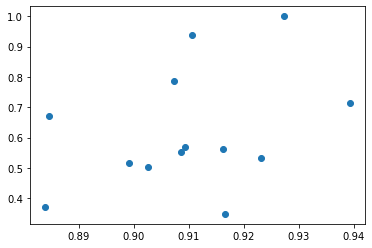

In [5]:
def plot_country_values(country_name, x_val, y_val):
    plt.scatter(data.loc[(country_name)][x_val], data.loc[(country_name)][y_val])

plot_country_values("Netherlands", "Life Ladder", "pos")

In [6]:
sub = data[sent_columns + happy_columns]
cor = sub.corr()

In [7]:
cor

,neg,neu,pos,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
neg,1.000000,-0.564766,-0.237732,0.152301,0.145890,0.100925,0.134324,-0.001566,-0.025451,-0.022898,0.015480,0.012758
neu,-0.564766,1.000000,-0.667229,-0.215749,-0.192888,-0.117743,-0.162394,-0.054247,-0.115510,0.088226,-0.058885,0.026262
pos,-0.237732,-0.667229,1.000000,0.116183,0.095229,0.047431,0.069984,0.065467,0.159103,-0.083160,0.055350,-0.042485
Life Ladder,0.152301,-0.215749,0.116183,1.000000,0.791586,0.715111,0.758905,0.541777,0.202462,-0.473124,0.539450,-0.301619
Log GDP per capita,0.145890,-0.192888,0.095229,0.791586,1.000000,0.721470,0.866540,0.370267,-0.028224,-0.358460,0.291765,-0.225759
Social support,0.100925,-0.117743,0.047431,0.715111,0.721470,1.000000,0.626916,0.431781,0.068824,-0.244475,0.453144,-0.392635
Healthy life expectancy at birth,0.134324,-0.162394,0.069984,0.758905,0.866540,0.626916,1.000000,0.402107,0.009904,-0.345233,0.331532,-0.139809
Freedom to make life choices,-0.001566,-0.054247,0.065467,0.541777,0.370267,0.431781,0.402107,1.000000,0.325980,-0.495595,0.619394,-0.284361
Generosity,-0.025451,-0.115510,0.159103,0.202462,-0.028224,0.068824,0.009904,0.325980,1.000000,-0.253613,0.375524,-0.120082
Perceptions of corruption,-0.022898,0.088226,-0.083160,-0.473124,-0.358460,-0.244475,-0.345233,-0.495595,-0.253613,1.000000,-0.290914,0.314604


In [8]:
cor_sub = cor.drop(sent_columns)
cor_sub = cor_sub.drop(happy_columns, axis=1)
cor_sub

,neg,neu,pos
Life Ladder,0.152301,-0.215749,0.116183
Log GDP per capita,0.145890,-0.192888,0.095229
Social support,0.100925,-0.117743,0.047431
Healthy life expectancy at birth,0.134324,-0.162394,0.069984
Freedom to make life choices,-0.001566,-0.054247,0.065467
Generosity,-0.025451,-0.115510,0.159103
Perceptions of corruption,-0.022898,0.088226,-0.083160
Positive affect,0.015480,-0.058885,0.055350
Negative affect,0.012758,0.026262,-0.042485


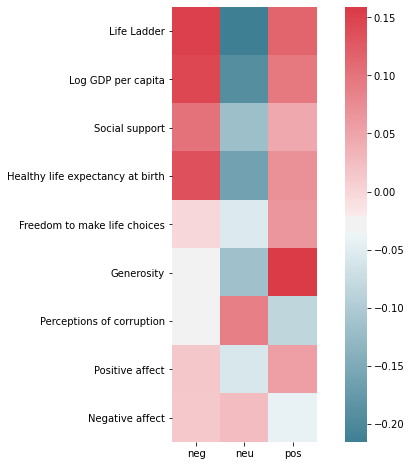

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
corr = cor_sub
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

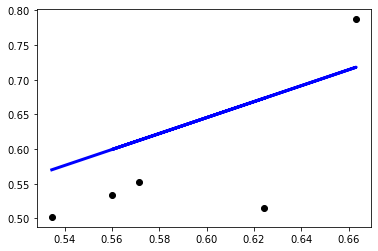

In [10]:
country_name = "Netherlands"
sent_atribute = "pos"
happy_attribute = ["Generosity"]

X = data.loc[country_name][happy_attribute].to_numpy()
y = data.loc[country_name][sent_atribute].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [11]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.15678998377578712

In [12]:
reg.score(X_test, y_test)

0.24604093023793738

In [109]:
sent_attributes = ["pos", "neg", "neu"]
happy_attributes = ["Generosity", "Life Ladder", "Social support", "Log GDP per capita"]
# happy_attributes = ["Generosity", "Life Ladder", "Social support"]


X = data[happy_attributes].to_numpy()
y = data[sent_attributes].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.03222434038174771

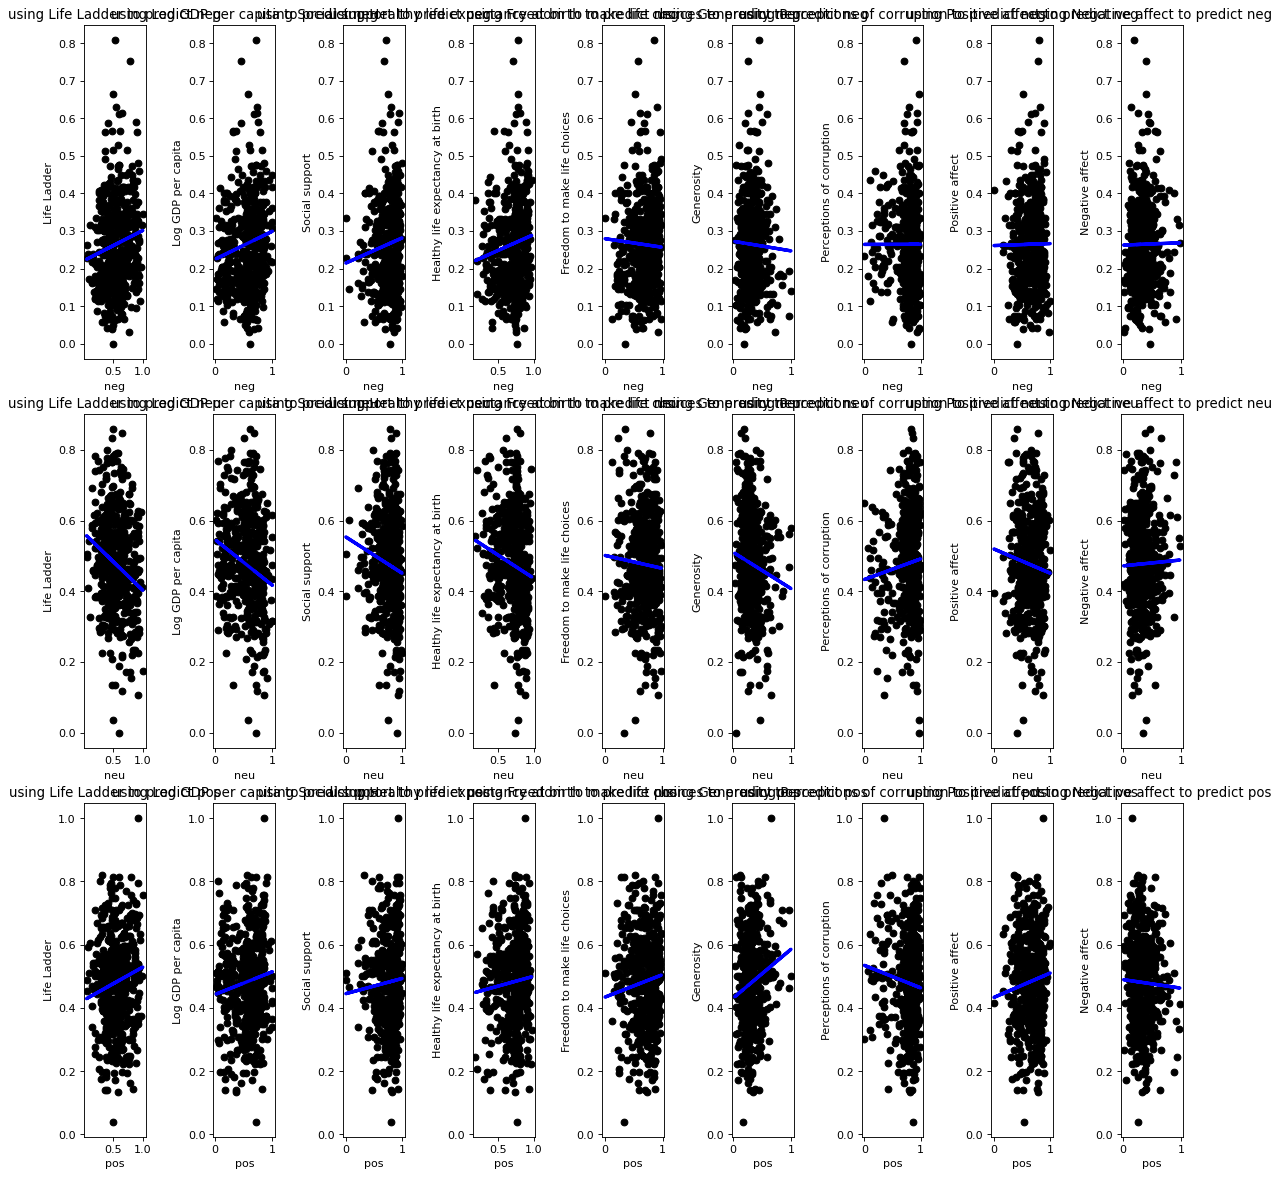

In [106]:
sent_attributes = ["pos", "neg", "neu"]
# happy_attributes = ["Generosity", "Life Ladder", "Social support", "Log GDP per capita"]
happy_attributes = ["Generosity", "Life Ladder", "Social support"]

fig = plt.figure(figsize=(15, 15), dpi=80)
axs = fig.subplots(len(sent_attributes), len(happy_attributes))
fig.tight_layout(pad=3.0)

for i in range(len(sent_attributes)):
    for j in range(len(happy_attributes)):
        sent_attribute = sent_attributes[i]
        happy_attribute = happy_attributes[j]
        X = data[happy_attribute].to_numpy()
        y = data[sent_attribute].to_numpy()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

        y_pred = reg.predict(X_test.reshape(-1, 1))

        axs[i,j].scatter(X_test, y_test,  color='black')
        axs[i,j].plot(X_test, y_pred, color='blue', linewidth=3)
        axs[i,j].title.set_text('using ' + happy_attributes[j] + " to predict " + sent_attributes[i])
        axs[i,j].set_xlabel(sent_attributes[i])
        axs[i,j].set_ylabel(happy_attributes[j])
plt.show()

In [105]:
X = data[happy_columns].to_numpy()
y = data[sent_columns].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regr = MLPRegressor(random_state=420, max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)

-0.016431222525559397

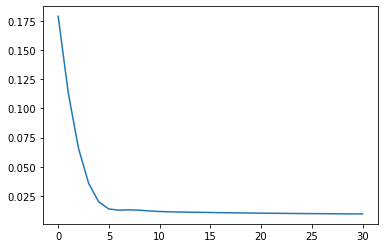

In [38]:
loss_values = regr.loss_curve_
plt.plot(loss_values)

KeyboardInterrupt: 

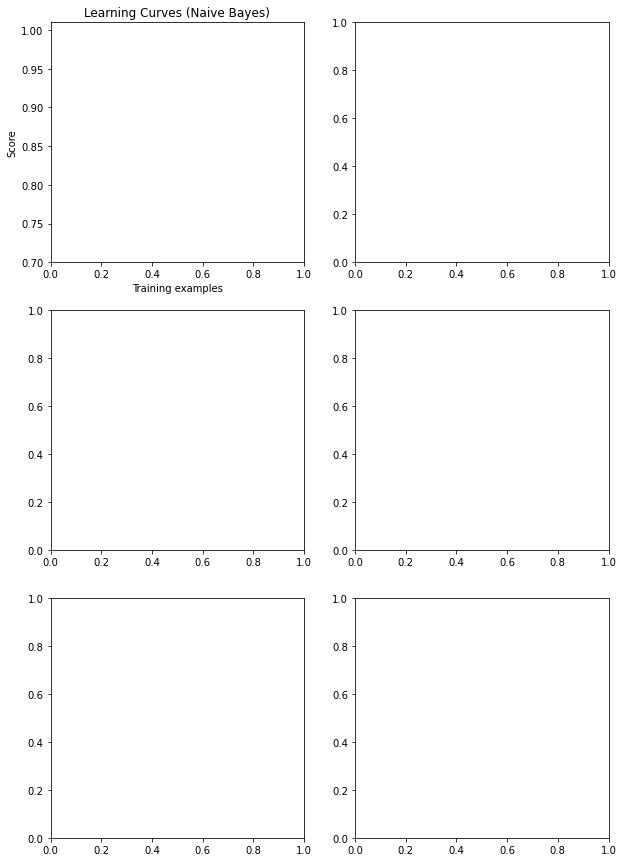

In [66]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X = data[happy_attributes].to_numpy()
y = data[sent_attributes].to_numpy()

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100,))
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC(gamma=0.001)
# plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                     cv=cv, n_jobs=4)

plt.show()

In [86]:
X = data[happy_columns].to_numpy()
y = data[sent_columns].to_numpy()

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

reg = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(100,50))
n_jobs = 5
train_sizes = np.linspace(.1, 1.0, 5)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,train_sizes=train_sizes,return_times=True)

Text(0, 0.5, 'Score')

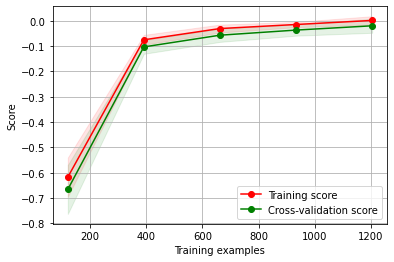

In [87]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")